Tuning $\gamma_D$

In [ ]:
import sys
sys.path.append("utils")
import dynamic_backtesting as db
import compare_strategies as cs
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["grey", "green", "black", "deepskyblue", "orange", "lime", "purple", "Gold", "brown", "blue", "pink"]) 

In [ ]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
stocks = tickers[:7]
stocks_dic = {asset: assets[asset] for asset in stocks }
commodities = tickers[7:9]
commodities_dic = {asset: assets[asset] for asset in commodities }
bonds = tickers[9:]
bonds_dic = {asset: assets[asset] for asset in bonds }

**All assets**

In [ ]:
sharpes_all, std_all = db.test_gamma_D_params(tickers, number_of_out_of_sample_days=1000, model_type="sGARCH11", portfolio_value=1e9,
                                  gamma_start=1e-6, gamma_end=1e-1, gamma_num=200)

In [ ]:
sharpes_all_pd = pd.DataFrame(sharpes_all, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_all_pd.set_index('gamma_D', drop=True, inplace=True)
std_all_pd = pd.DataFrame(std_all, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_all_pd.set_index('gamma_D', drop=True, inplace=True)

In [ ]:
# min std gamma
min_gamma_all=std_all_pd.loc[std_all_pd["GARCH TC"] == min(std_all_pd["GARCH TC"]) ]
# max SR gamma
max_gamma_all=sharpes_all_pd.loc[sharpes_all_pd["GARCH TC"] == max(sharpes_all_pd["GARCH TC"]) ]
print(str(min_gamma_all)+"\n"+str(max_gamma_all))

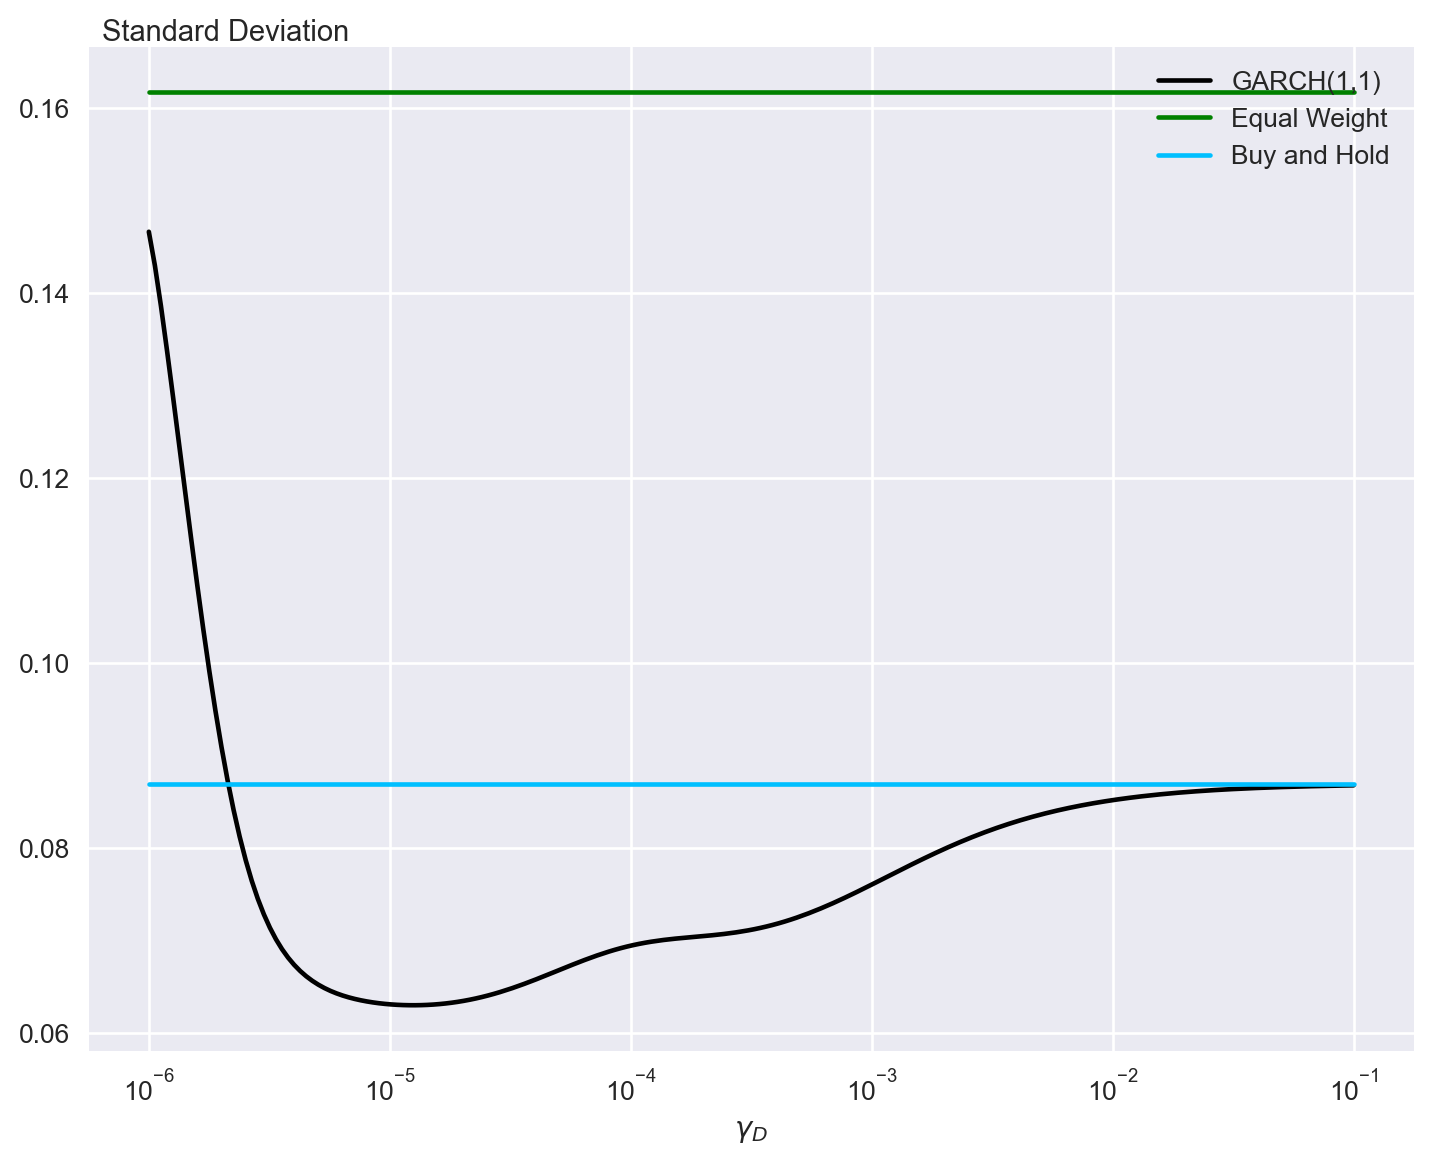

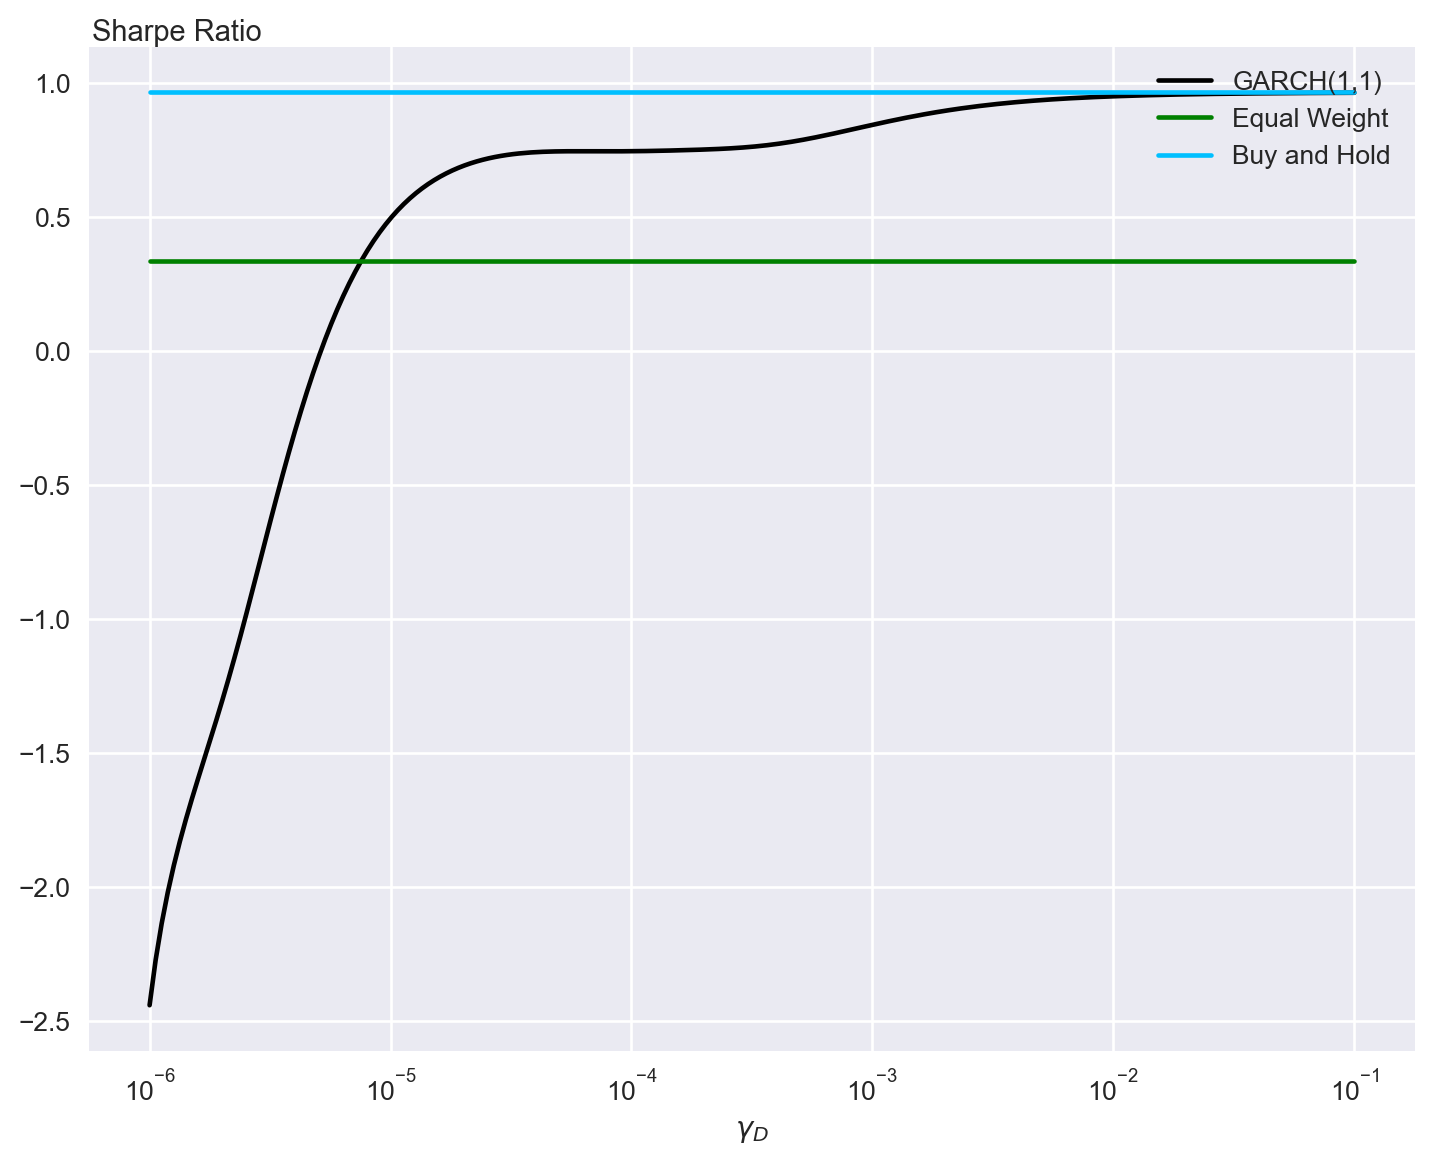

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue",]))
ax.plot(std_all_pd)
ax.legend(["GARCH(1,1)", "Equal Weight", "Buy and Hold"], loc='upper right')
ax.set_xlabel("$\gamma_D$")
ax.set_ylabel('Standard Deviation',loc='top', rotation = 0, labelpad = -125)
ax.set_xscale('log')
#ax.set_yscale('log') 
fig.savefig("Tuning_Gamma_std_all.png", bbox_inches = 'tight', pad_inches = 0.1)

fig1, ax1 = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax1.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue",]))
ax1.plot(sharpes_all_pd)
ax1.legend(["GARCH(1,1)", "Equal Weight", "Buy and Hold"], loc='upper right')
ax1.set_xlabel("$\gamma_D$")
ax1.set_ylabel('Sharpe Ratio',loc='top', rotation = 0, labelpad = -92)
ax1.set_xscale('log') 
fig1.savefig("Tuning_Gamma_sharpes_all.png", bbox_inches = 'tight', pad_inches = 0.1)

 **Stocks**

In [ ]:
sharpes_stocks, std_stocks = db.test_gamma_D_params(stocks, number_of_out_of_sample_days=1000, model_type="sGARCH11", portfolio_value=1e9,
                                  gamma_start=5e-5, gamma_end=1e-1, gamma_num=200)

In [ ]:
sharpes_stocks_pd = pd.DataFrame(sharpes_stocks, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_stocks_pd.set_index('gamma_D', drop=True, inplace=True)
std_stocks_pd = pd.DataFrame(std_stocks, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_stocks_pd.set_index('gamma_D', drop=True, inplace=True)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue",]))
ax.plot(std_stocks_pd)
ax.legend(["GARCH(1,1)", "Equal Weight", "Buy and Hold"], loc='upper right')
ax.set_xlabel("$\gamma_D$")
ax.set_ylabel('Standard Deviation',loc='top', rotation = 0, labelpad = -125)
ax.set_xscale('log')
#ax.set_yscale('log') 
fig.savefig("Tuning_Gamma_std_stocks.png", bbox_inches = 'tight', pad_inches = 0.1)

fig1, ax1 = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax1.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue",]))
ax1.plot(sharpes_stocks_pd)
ax1.legend(["GARCH(1,1)", "Equal Weight", "Buy and Hold"], loc='upper right')
ax1.set_xlabel("$\gamma_D$")
ax1.set_ylabel('Sharpe Ratio',loc='top', rotation = 0, labelpad = -92)
ax1.set_xscale('log') 
fig1.savefig("Tuning_Gamma_sharpes_stocks.png", bbox_inches = 'tight', pad_inches = 0.1)

**Commodities**

In [ ]:
sharpes_commodities, std_commodities = db.test_gamma_D_params(commodities, number_of_out_of_sample_days=1000, model_type="sGARCH11", portfolio_value=1e9,
                                  gamma_start=1e-6, gamma_end=1e-1, gamma_num=200)

In [ ]:
sharpes_commodities_pd = pd.DataFrame(sharpes_commodities, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_commodities_pd.set_index('gamma_D', drop=True, inplace=True)
std_commodities_pd = pd.DataFrame(std_commodities, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_commodities_pd.set_index('gamma_D', drop=True, inplace=True)

In [ ]:
# min std gamma
min_gamma_com=std_commodities_pd.loc[std_commodities_pd["GARCH TC"] == min(std_commodities_pd["GARCH TC"]) ]
# max SR gamma
max_gamma_com=sharpes_commodities_pd.loc[sharpes_commodities_pd["GARCH TC"] == max(sharpes_commodities_pd["GARCH TC"]) ]
print(str(min_gamma_com)+"\n"+str(max_gamma_com))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue",]))
ax.plot(std_commodities_pd)
ax.legend(["GARCH(1,1)", "Equal Weight", "Buy and Hold"], loc='upper right')
ax.set_xlabel("$\gamma_D$")
ax.set_ylabel('Standard Deviation',loc='top', rotation = 0, labelpad = -125)
ax.set_xscale('log')
#ax.set_yscale('log') 
fig.savefig("Tuning_Gamma_std_com.png", bbox_inches = 'tight', pad_inches = 0.1)

fig1, ax1 = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax1.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue",]))
ax1.plot(sharpes_commodities_pd)
ax1.legend(["GARCH(1,1)", "Equal Weight", "Buy and Hold"], loc='upper right')
ax1.set_xlabel("$\gamma_D$")
ax1.set_ylabel('Sharpe Ratio',loc='top', rotation = 0, labelpad = -92)
ax1.set_xscale('log') 
fig1.savefig("Tuning_Gamma_sharpes_com.png", bbox_inches = 'tight', pad_inches = 0.1)

**Bonds**

In [ ]:
sharpes_bonds, std_bonds = db.test_gamma_D_params(bonds, number_of_out_of_sample_days=1000, model_type="sGARCH11", portfolio_value=1e9,
                                  gamma_start=5e-5, gamma_end=1e-1, gamma_num=200)

In [ ]:
sharpes_bonds_pd = pd.DataFrame(sharpes_bonds, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_bonds_pd.set_index('gamma_D', drop=True, inplace=True)
std_bonds_pd = pd.DataFrame(std_bonds, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_bonds_pd.set_index('gamma_D', drop=True, inplace=True)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue",]))
ax.plot(std_bonds_pd)
ax.legend(["GARCH(1,1)", "Equal Weight", "Buy and Hold"], loc='upper right')
ax.set_xlabel("$\gamma_D$")
ax.set_ylabel('Standard Deviation',loc='top', rotation = 0, labelpad = -125)
ax.set_xscale('log')
#ax.set_yscale('log') 
fig.savefig("Tuning_Gamma_std_bond.png", bbox_inches = 'tight', pad_inches = 0.1)

fig1, ax1 = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax1.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue",]))
ax1.plot(sharpes_bonds_pd)
ax1.legend(["GARCH(1,1)", "Equal Weight", "Buy and Hold"], loc='upper right')
ax1.set_xlabel("$\gamma_D$")
ax1.set_ylabel('Sharpe Ratio',loc='top', rotation = 0, labelpad = -92)
ax1.set_xscale('log') 
fig1.savefig("Tuning_Gamma_sharpes_bond.png", bbox_inches = 'tight', pad_inches = 0.1)